In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [27]:
# clean out NaNs and zeros
def extract_all_active_observations_v2(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])) and not any(selected_obs[i,:]==0):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

In [2]:
def plot_time_series(data):
    # only plotting x
    length = data.shape[0]
    fig = plt.figure(figsize = [20,10])
    ax1 = fig.add_subplot(511)
    ax1.plot(data[:,1], label='array 0')  # array 0
    ax1.set_xlim(0,length)
    ax1.set_ylim(-1,1)
    ax1.legend()
    ax2 = fig.add_subplot(512)
    ax2.plot(data[:,4], label='array 1')  # array 1
    ax2.set_xlim(0,length)
    ax2.set_ylim(-1,1)
    ax2.legend()
    ax3 = fig.add_subplot(513)
    ax3.plot(data[:,7], label='array 2')  # array 2
    ax3.set_xlim(0,length)
    ax3.set_ylim(-1,1)
    ax3.legend()  
    ax4 = fig.add_subplot(514)
    ax4.plot(data[:,10], label='array 3') # array 3
    ax4.set_xlim(0,length)
    ax4.set_ylim(-1,1)
    ax4.legend()
    ax5 = fig.add_subplot(515)
    ax5.plot(data[:,16], label='array 5') # array 5
    ax5.set_xlim(0,length)
    ax5.set_ylim(-1,1)
    ax5.legend()
    plt.show()

## note
Different from previous static point experiments, two arrays are mounted onto the wall: array 0 and 1, and array 2, 3, 5 are mounted to the ceiling. 

###  chair move

chair move take 3

In [24]:
chair_move = get_time_interval_matrix_data("Dec 30 2020 03:55PM", "Dec 30 2020 03:56PM")

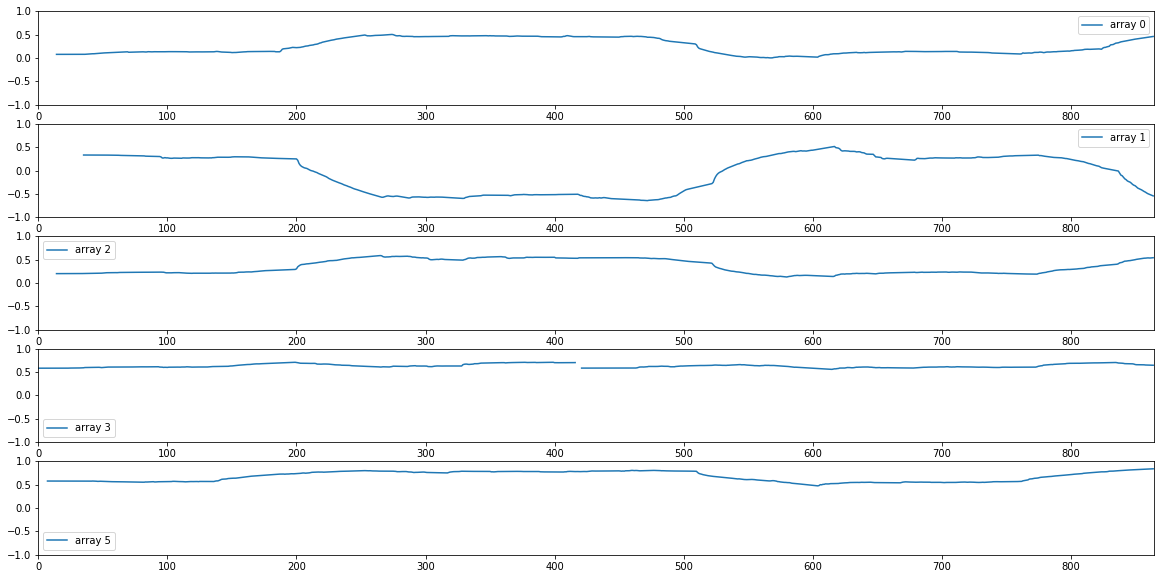

In [25]:
plot_time_series(chair_move)

In [28]:
chair_move_cleaned, chair_move_og = extract_all_active_observations_v2(chair_move, [0,1,2,3,5])

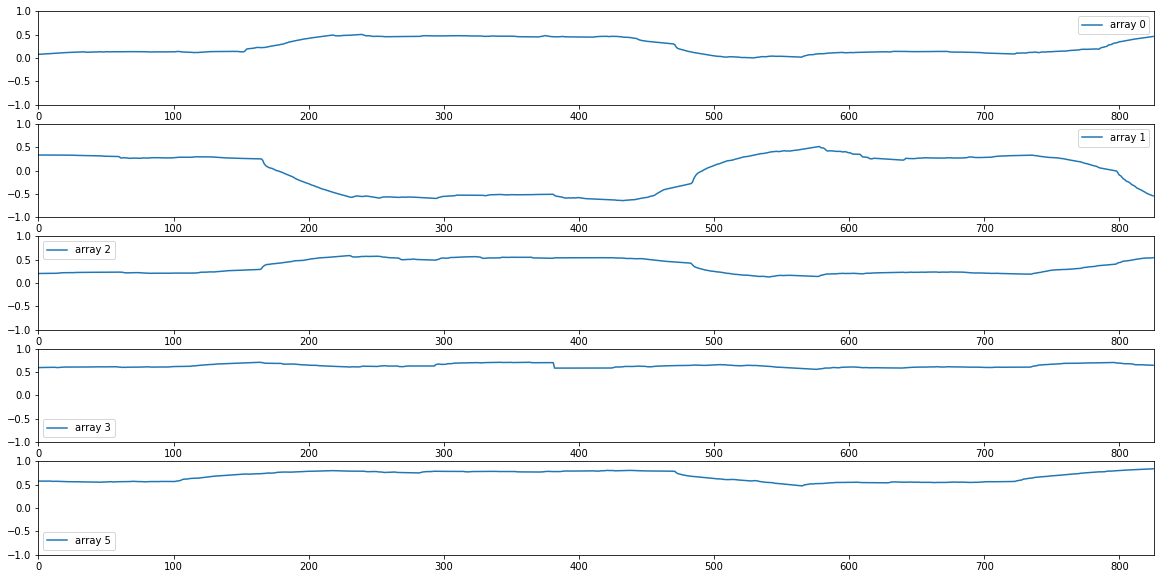

In [31]:
plot_time_series(chair_move_og)

### arch

In [ ]:
arch = get_time_interval_matrix_data("Dec 30 2020 03:02PM", "Dec 30 2020 03:05PM")

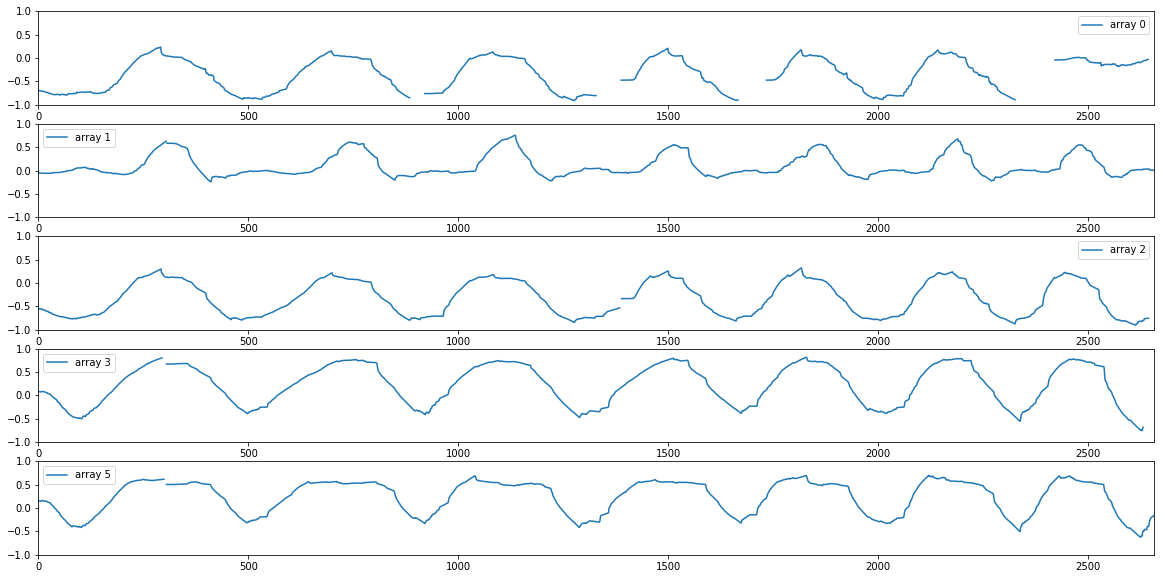

In [12]:
plot_time_series(arch)

Edited the configuration file to have the spatial filter changed

In [10]:
arch_edited = get_time_interval_matrix_data("Dec 30 2020 03:31PM", "Dec 30 2020 03:33PM")

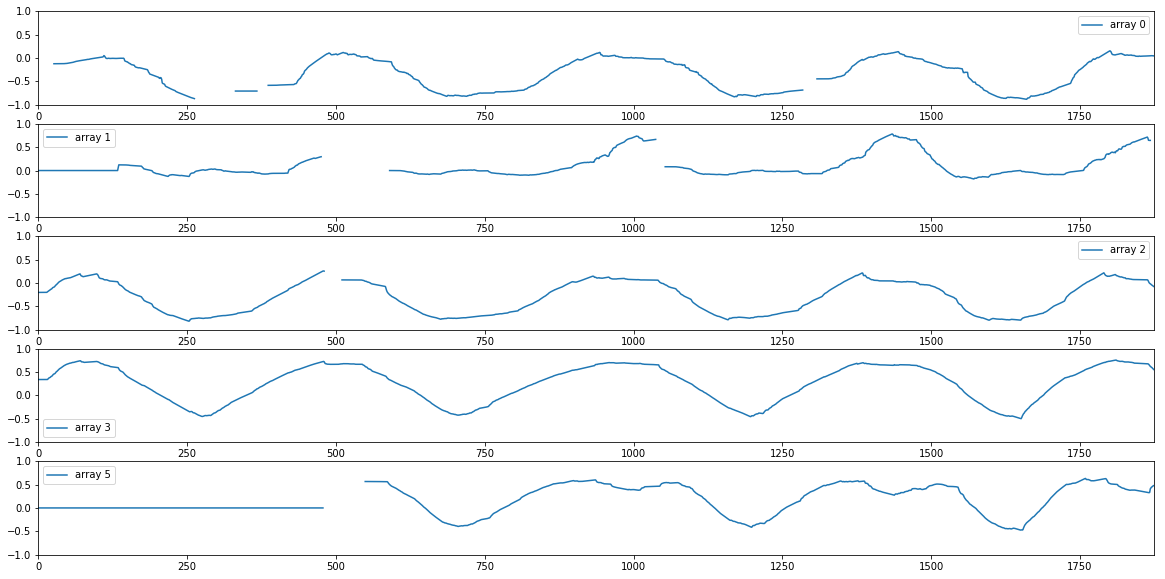

In [11]:
plot_time_series(arch_edited)